In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_excel("Superstore Sales.xlsx")
df.head()

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1914,13729,2009-01-01,Not Specified,9,872.48,0.08,Express Air,-342.910,95.99,...,Matt Collister,Quebec,Quebec,Home Office,Office Supplies,Storage & Organization,Safco Industrial Wire Shelving,Large Box,NaN,2009-01-03
1,4031,28774,2009-01-01,High,32,180.36,0.10,Regular Air,-111.800,5.98,...,Jessica Myrick,Ontario,Ontario,Small Business,Office Supplies,Storage & Organization,"Perma STOR-ALL™ Hanging File Box, 13 1/8""W x 1...",Small Box,0.68,2009-01-02
2,1279,9285,2009-01-02,Critical,3,124.81,0.06,Regular Air,-11.937,40.98,...,David Philippe,Nova Scotia,Atlantic,Consumer,Office Supplies,Binders and Binder Accessories,"Avery Trapezoid Ring Binder, 3"" Capacity, Blac...",Small Box,0.36,2009-01-04
3,6224,44069,2009-01-02,Critical,16,137.63,0.09,Express Air,26.710,9.11,...,Elizabeth Moffitt,British Columbia,West,Consumer,Office Supplies,Paper,"Black Print Carbonless Snap-Off® Rapid Letter,...",Wrap Bag,0.40,2009-01-04
4,6225,44069,2009-01-02,Critical,43,614.80,0.08,Regular Air,247.790,15.04,...,Elizabeth Moffitt,British Columbia,West,Consumer,Office Supplies,Paper,White GlueTop Scratch Pads,Wrap Bag,0.39,2009-01-02


In [5]:
df.shape

(8390, 21)

In [6]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Order Priority', 'Order Quantity',
       'Sales', 'Discount', 'Ship Mode', 'Profit', 'Unit Price',
       'Shipping Cost', 'Customer Name', 'Province', 'Region',
       'Customer Segment', 'Product Category', 'Product Sub-Category',
       'Product Name', 'Product Container', 'Product Base Margin',
       'Ship Date'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8390 entries, 0 to 8389
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                8390 non-null   int64         
 1   Order ID              8390 non-null   int64         
 2   Order Date            8390 non-null   datetime64[ns]
 3   Order Priority        8390 non-null   object        
 4   Order Quantity        8390 non-null   int64         
 5   Sales                 8390 non-null   float64       
 6   Discount              8390 non-null   float64       
 7   Ship Mode             8390 non-null   object        
 8   Profit                8390 non-null   float64       
 9   Unit Price            8390 non-null   float64       
 10  Shipping Cost         8390 non-null   float64       
 11  Customer Name         8390 non-null   object        
 12  Province              8390 non-null   object        
 13  Region            

In [8]:
df.describe()

,Row ID,Order ID,Order Date,Order Quantity,Sales,Discount,Profit,Unit Price,Shipping Cost,Product Base Margin,Ship Date
count,8390.000000,8390.000000,8390,8390.000000,8390.000000,8390.000000,8390.000000,8390.000000,8390.000000,8327.000000,8390
mean,4195.500000,29932.999166,2010-12-24 21:49:12.943980800,25.564601,1775.466315,0.049677,181.060342,89.354539,12.841080,0.512504,2010-12-26 22:37:26.674612736
min,1.000000,3.000000,2009-01-01 00:00:00,1.000000,2.240000,0.000000,-14140.701600,0.990000,0.490000,0.350000,2009-01-02 00:00:00
25%,2098.250000,14989.500000,2009-12-20 00:00:00,13.000000,142.962500,0.020000,-83.295000,6.480000,3.300000,0.380000,2009-12-22 00:00:00
50%,4195.500000,29811.500000,2010-12-15 12:00:00,26.000000,449.295000,0.050000,-1.515000,20.990000,6.070000,0.520000,2010-12-17 12:00:00
75%,6292.750000,44539.250000,2012-01-01 18:00:00,38.000000,1709.985000,0.080000,162.544500,85.990000,13.990000,0.590000,2012-01-03 18:00:00
max,8390.000000,59939.000000,2012-12-30 00:00:00,50.000000,89061.050000,0.250000,27220.690000,6783.020000,164.730000,0.850000,2012-12-30 00:00:00
std,2422.128713,17242.133927,NaN,14.481768,3585.180194,0.031817,1197.067399,290.479112,17.271407,0.135600,NaN


In [10]:
# Data cleaning and pre-processing

df['Order Date']=pd.to_datetime(df['Order Date'])

In [12]:
#Checking the missing values

df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Order Priority,0
Order Quantity,0
Sales,0
Discount,0
Ship Mode,0
Profit,0
Unit Price,0


In [13]:
#Remove Duplicates

df.drop_duplicates(inplace=True)

In [15]:
#Feature engineering

# Create Year and Month

df['Year']=df['Order Date'].dt.year
df['Month']=df['Order Date'].dt.month
df['Month_Name']=df['Order Date'].dt.month_name()



In [17]:
#KPI

total_sales=df['Sales'].sum()
total_profit=df['Profit'].sum()
total_orders=df['Order ID'].nunique()

total_sales,total_profit,total_orders

(np.float64(14896162.379999999), np.float64(1519096.2660810002), 5491)

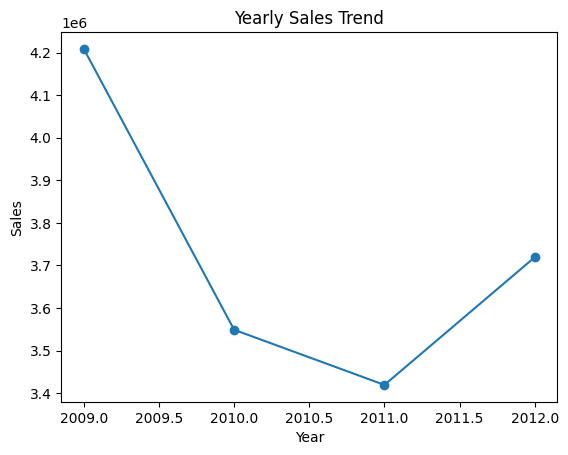

In [23]:
# Exploratory Data Analysis

# Yearly sales Trend

yearly_sales=df.groupby('Year')['Sales'].sum()
yearly_sales.plot(marker='o',title='Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

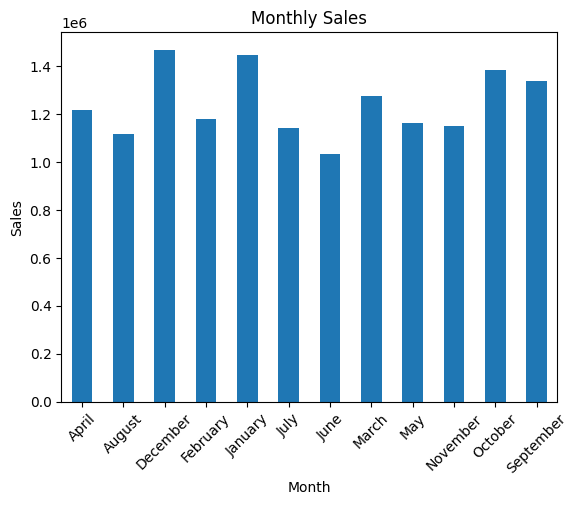

In [26]:
# Monthly sales

monthly_sales=df.groupby('Month_Name')['Sales'].sum()
monthly_sales.plot(kind='bar',title='Monthly Sales')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

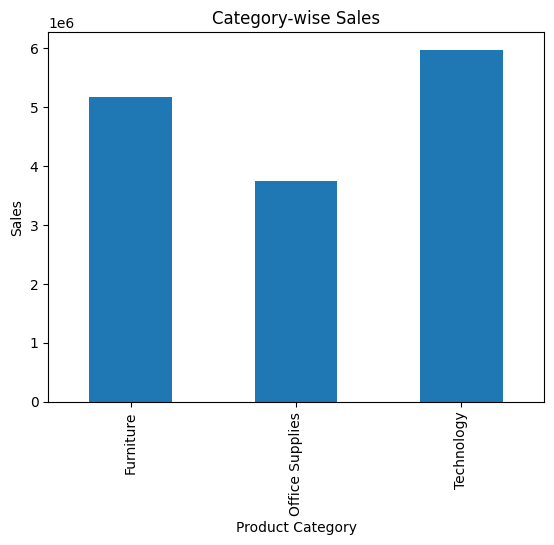

In [29]:
# Category-wise Sales

category_sales=df.groupby('Product Category')['Sales'].sum()
category_sales.plot(kind='bar',title='Category-wise Sales')
plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.show()

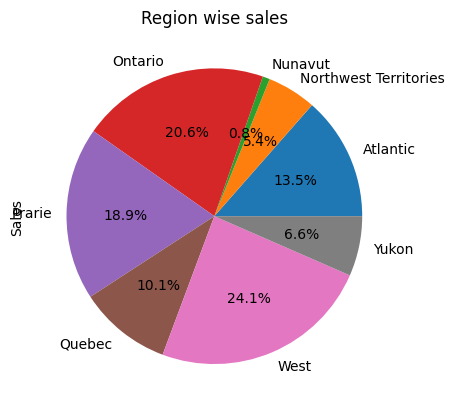

In [30]:
# Region wise sales

region_sales=df.groupby('Region')['Sales'].sum()
region_sales.plot(kind='pie',title='Region wise sales',autopct='%1.1f%%')
plt.show()

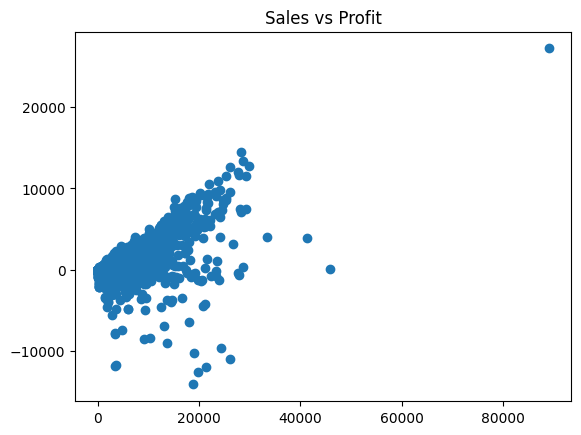

In [32]:
# Sales vs Profit

plt.scatter(x=df['Sales'],y=df['Profit'])
plt.title('Sales vs Profit')
plt.show()

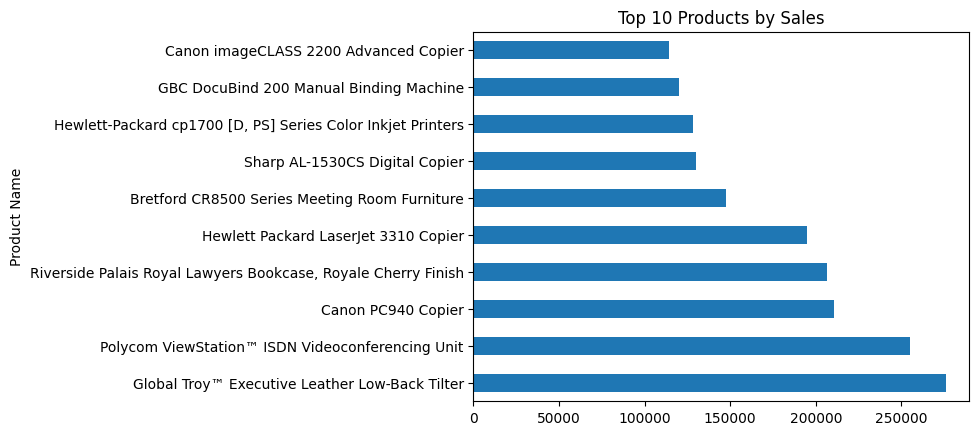

In [33]:
top_products=df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

top_products.plot(kind='barh',title='Top 10 Products by Sales')
plt.show()

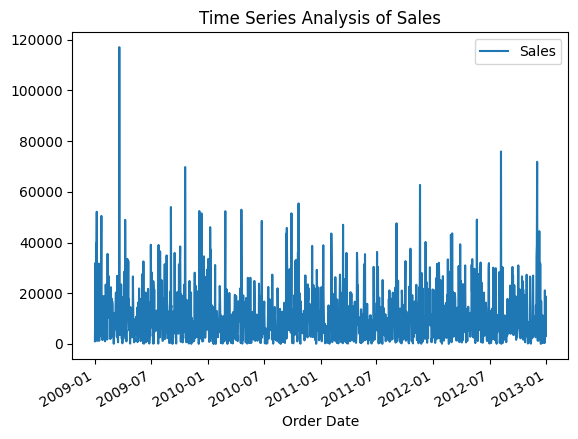

In [36]:
# Time series Analysis

sales_ts=df.groupby('Order Date')['Sales'].sum().reset_index()
sales_ts.set_index('Order Date',inplace=True)
sales_ts.plot(title='Time Series Analysis of Sales')
plt.show()




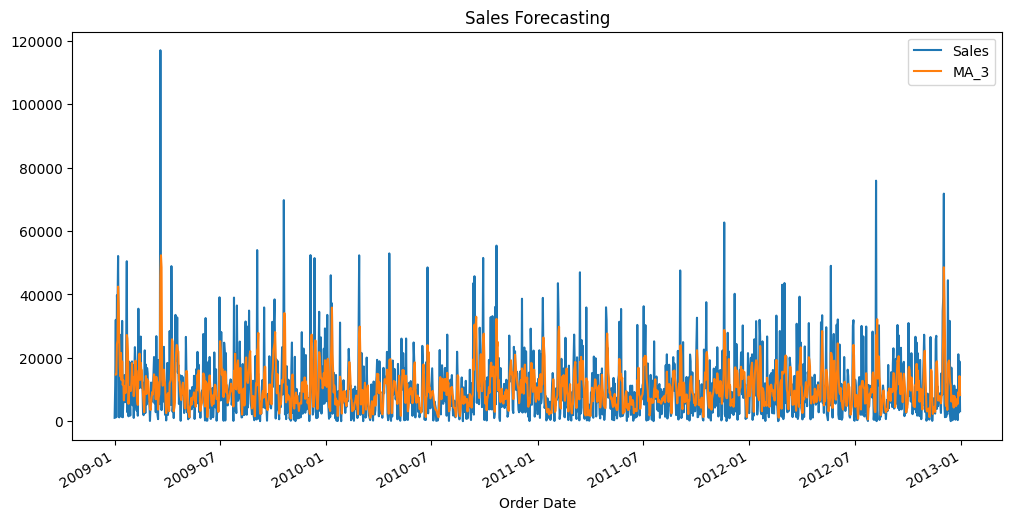

In [38]:
# Sales Forecasting(Simple Moving Average)

sales_ts['MA_3'] = sales_ts['Sales'].rolling(window=3).mean()

sales_ts[['Sales', 'MA_3']].plot(figsize=(12,6))
plt.title('Sales Forecasting')
plt.show()

### Business Insights

- Technology category generates highest revenue.
- West and East regions contribute most to total sales.
- Sales increase during year-end months.
- Some high-sales orders show negative profit indicating discount issues.
- Few products dominate revenue, showing dependency on top sellers.


In [40]:
df.to_csv("superstore_final.csv", index=False)
